### 1. Problem 

https://www.kaggle.com/datasets/apurboshahidshawon/weatherdatabangladesh

Data Description

Date - Date of the Observation in DD-MM-YYYY

MinTemp - The Minimum temperature during a particular day. (degree Celsius)

MaxTemp - The maximum temperature during a particular day. (degree Celsius)

Rainfall - Rainfall during a particular day. (millimeters)

Evaporation - Evaporation during a particular day. (millimeters)

Sunshine - Bright sunshine during a particular day. (hours)

WindGusDir - The direction of the strongest gust during a particular day.(16 compass points)

WindGuSpeed - Speed of strongest gust during a particular day. (kilometers per hour)

WindDir9am - The direction of the wind for 10 min prior to 9 am. (compass points)

WindDir3pm - The direction of the wind for 10 min prior to 3 pm. (compass points)

WindSpeed9am - Speed of the wind for 10 min prior to 9 am. (kilometers per hour)

WindSpeed3pm - Speed of the wind for 10 min prior to 3 pm. (kilometers per hour)

Humidity9am - The humidity of the wind at 9 am. (percent)

Humidity3pm - The humidity of the wind at 3 pm. (percent)

Pressure9am - Atmospheric pressure at 9 am. (hectopascals)

Pressure3pm - Atmospheric pressure at 3 pm. (hectopascals)

Cloud9am- Cloud-obscured portions of the sky at 9 am. (eighths)

Cloud3pm - Cloud-obscured portions of the sky at 3 pm. (eighths)

Temp9am - The temperature at 9 am. (degree Celsius)

Temp3pm - The temperature at 3 pm. (degree Celsius)

RainToday - If today is rainy then ‘Yes’. If today is not rainy then ‘No’.

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error, r2_score

### 2. Loading data

In [2]:
df = pd.read_csv('Weather_Data.csv')

In [3]:
df.head()

,Date,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,RainToday,Evaporation,Sunshine,WindGustDir,...,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
0,01-02-13,20.7,20.9,19.5,22.4,15.6,Yes,6.2,0.0,W,...,S,SSW,17,20,92,84,1017.6,1017.4,8,8
1,02-02-13,22.4,24.8,19.5,25.6,6.0,Yes,3.4,2.7,W,...,W,E,9,13,83,73,1017.9,1016.4,7,7
2,03-02-13,23.5,23.0,21.6,24.5,6.6,Yes,2.4,0.1,W,...,ESE,ESE,17,2,88,86,1016.7,1015.6,7,8
3,04-02-13,21.4,20.9,20.2,22.8,18.8,Yes,2.2,0.0,W,...,NNE,E,22,20,83,90,1014.2,1011.8,8,8
4,05-02-13,22.5,25.5,19.7,25.7,77.4,Yes,4.8,0.0,W,...,NNE,W,11,6,88,74,1008.3,1004.8,8,8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   Temp9am        3271 non-null   float64
 2   Temp3pm        3271 non-null   float64
 3   MinTemp        3271 non-null   float64
 4   MaxTemp        3271 non-null   float64
 5   Rainfall       3271 non-null   float64
 6   RainToday      3271 non-null   object 
 7   Evaporation    3271 non-null   float64
 8   Sunshine       3271 non-null   float64
 9   WindGustDir    3271 non-null   object 
 10  WindGustSpeed  3271 non-null   int64  
 11  WindDir9am     3271 non-null   object 
 12  WindDir3pm     3271 non-null   object 
 13  WindSpeed9am   3271 non-null   int64  
 14  WindSpeed3pm   3271 non-null   int64  
 15  Humidity9am    3271 non-null   int64  
 16  Humidity3pm    3271 non-null   int64  
 17  Pressure9am    3271 non-null   float64
 18  Pressure

In [8]:
numeric_df = df.select_dtypes(include=['float64','int64'])
print(numeric_df.shape)
numeric_df.corr()

(3271, 16)


,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
Temp9am,1.000000,0.828457,0.939307,0.858639,-0.054297,0.606122,0.113891,0.159570,-0.334084,0.280009,-0.145944,0.131855,-0.417437,-0.401353,0.093204,0.068683
Temp3pm,0.828457,1.000000,0.753147,0.960805,-0.142748,0.474599,0.345528,0.036216,-0.351836,0.136713,-0.155192,-0.212696,-0.342862,-0.387945,-0.086544,-0.144965
MinTemp,0.939307,0.753147,1.000000,0.771005,0.013995,0.569316,-0.063475,0.127792,-0.298040,0.225905,0.053946,0.273269,-0.391654,-0.353334,0.241248,0.164028
MaxTemp,0.858639,0.960805,0.771005,1.000000,-0.139306,0.510334,0.327422,0.073184,-0.349382,0.155542,-0.185382,-0.150741,-0.385853,-0.420375,-0.084695,-0.099217
Rainfall,-0.054297,-0.142748,0.013995,-0.139306,1.000000,-0.110343,-0.308962,0.149811,0.153696,0.039415,0.332636,0.305635,-0.037561,0.001780,0.245231,0.200999
Evaporation,0.606122,0.474599,0.569316,0.510334,-0.110343,1.000000,0.175932,0.245426,-0.077532,0.292469,-0.395651,-0.102295,-0.343581,-0.298303,-0.037051,-0.038422
Sunshine,0.113891,0.345528,-0.063475,0.327422,-0.308962,0.175932,1.000000,-0.029032,-0.058410,0.177813,-0.490631,-0.586476,-0.047789,-0.094507,-0.665014,-0.677861
WindGustSpeed,0.159570,0.036216,0.127792,0.073184,0.149811,0.245426,-0.029032,1.000000,0.256460,0.509825,-0.225613,-0.095037,-0.408876,-0.351850,0.024275,0.044016
WindSpeed9am,-0.334084,-0.351836,-0.298040,-0.349382,0.153696,-0.077532,-0.058410,0.256460,1.000000,0.197669,-0.189763,-0.148849,0.003737,0.091878,-0.062441,-0.018030
WindSpeed3pm,0.280009,0.136713,0.225905,0.155542,0.039415,0.292469,0.177813,0.509825,0.197669,1.000000,-0.288910,-0.135039,-0.333810,-0.277749,-0.050932,-0.095435


In [9]:
df['RainToday'].value_counts()

RainToday
No     2422
Yes     849
Name: count, dtype: int64

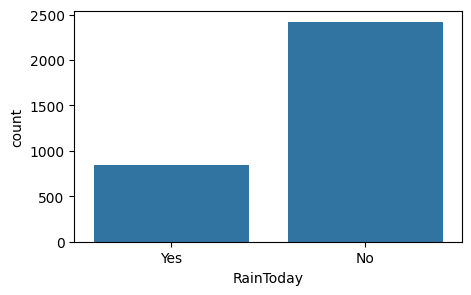

In [15]:
plt.figure(figsize=(5,3))
sns.countplot(data = df, x = 'RainToday')
plt.draw()

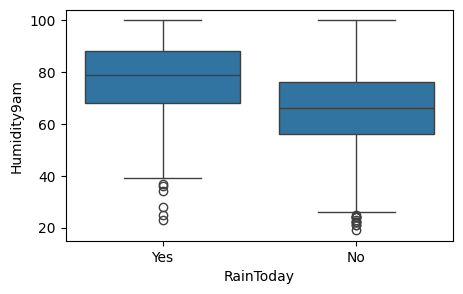

In [22]:
plt.figure(figsize=(5,3))
sns.boxplot(x='RainToday',y='Humidity9am',data = df)
plt.show()

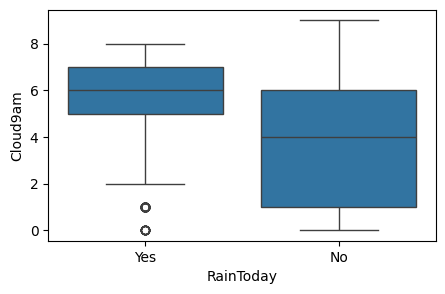

In [20]:
plt.figure(figsize=(5,3))
sns.boxplot(x='RainToday',y='Cloud9am',data = df)
plt.show()

In [ ]:
sns